# *Unsupervised learning: k-means clustering*

[http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [1]:
## Importing basic packages

import os
import random
import numpy as np

In [2]:
%%capture
## Downloading several hundred New York Times articles as text files

os.chdir('/sharedfolder/')

!wget -N https://github.com/pcda17/pcda17.github.io/raw/master/week/10/nyt_articles_11-9-2017.zip
!unzip -o nyt_articles_11-9-2017.zip

In [3]:
## Loading all text files in the current directory as a list of strings

os.chdir('/sharedfolder/nyt_articles_11-9-2017/')

document_list = []

for filename in [item for item in os.listdir('./') if '.txt' in item]: # Excluding files other than .txt with a list comprehension
    text_data = open(filename).read()
    document_list.append(text_data)

print(len(document_list)) # Printing number of documents in list

random.choice(document_list) # Viewing a single document chosen at random

451


"The seal stone comes from an untouched shaft grave near the ancient palace of Pylos. The grave was discovered in May 2015 by Jack L. Davis and Sharon R. Stocker, archaeologists at the University of Cincinnati who had been digging at Pylos for more than 25 years.  “It was after cleaning, during the process of drawing and photography, that our excitement slowly rose as we gradually came to realize that we had unearthed a masterpiece,” they wrote in the journal Hesperia.  Photo  The seal stone presents two mysteries. One is how and why it was engraved in such detail. The other is whether its battle scene, strongly evocative of those in Homer’s “Iliad” and “Odyssey,” depicts an event that contributed to the oral tradition behind the works of Homer.  The seal stone’s owner, known as the Griffin Warrior after the mythical animal depicted in his grave, was buried around 1450 B.C. He lived at a critical period when the Minoan civilization of Crete was being transferred to cities of the Greek 

In [4]:
## Creating stop word list

from nltk.corpus import stopwords
import string

stop_words = stopwords.words('english') + ["'s", "'re", '”', '“', '‘', '’', '—'] + list(string.punctuation)

stop_words[:10]     ## Viewing first 10 stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [5]:
## Tokenizing, stemming, and removing stop words from our list of documents

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

documents_filtered = []

for document in document_list:
    token_list = word_tokenize(document.lower())                                 ## Tokenizing
    tokens_filtered = [item for item in token_list if (item not in stop_words)]  ## Removing stop words
    tokens_filtered = [stemmer.stem(item) for item in tokens_filtered]           ## Stemming
    documents_filtered.append(' '.join(tokens_filtered))

In [6]:
## Viewing a preprocessed document

random.choice(documents_filtered)

'blockbust season video game holiday season way game industri push divers lineup titl new instal long-run franchis like activis call duti ubisoft assassin creed ea long-await star war battlefront ii real crowd pleaser year may hardwar microsoft nintendo offer new upgrad consol soni rereleas playstat 4 consol power ps4 pro last year hottest hardwar ticket nintendo switch consol offer gamer option plug home pull dock play go even though releas eight month ago switch still popular suppli expect problem end year arriv week microsoft new xbox one x consol featur process power 4k resolut mean defin pictur qualiti also expect make wave consol support hundr game xbox back catalog includ xbox one titl well select xbox 360 titl advertis continu read main stori expect fuel spend game rose 7 percent 14 billion first half year period 2016 accord npd group expect growth continu edg holiday said mat piscatella analyz video game industri npd'

In [7]:
## Vectorizing preprocessed documents

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(documents_filtered) 

In [8]:
## Creating a vocabulary list corresponding to the vectors we created above

vocabulary = vectorizer.get_feature_names()

vocabulary[1140:1160]

['amort',
 'amount',
 'amped',
 'ampl',
 'amplif',
 'amplifi',
 'ampush',
 'amsterdam',
 'amtrak',
 'amulet',
 'amus',
 'ana',
 'anab',
 'anal',
 'analog',
 'analogu',
 'analys',
 'analysi',
 'analyst',
 'analyt']

In [9]:
## Clustering documents

from sklearn.cluster import KMeans

kmeans_classifier = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=500, algorithm='auto')
                                   ## ^ docuements to be grouped in 8 clusters 

cluster_classes = kmeans_classifier.fit_predict(X) 

cluster_classes[:20]               ## Viewing first 20 cluster assignments

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2], dtype=int32)

In [10]:
## Our cluster assignments and document lists are the same size, in the same order.

print(len(cluster_classes))

print(len(documents_filtered))

print(len(document_list))

451
451
451


In [11]:
## We can view a document and its assigned cluster by accessing the same index in both lists

index_num = 130

print('Cluster assignment:')
print(cluster_classes[index_num])
print()
print('Document:')
print(document_list[index_num])

Cluster assignment:
2

Document:
“The one thing that I never wanted for him was to feel any type of racism where he felt like he was being targeted simply because he’s an African-American male,” Ms. Carr said.  It is unclear who took the video, which appears to have been recorded with a phone, and when. Ms. Carr said her daughter brought it to her attention on Nov. 2.  Ms. Carr asked that her son’s name not be published because he is a minor and “not the type of kid that really likes a lot of attention.” She said he told her that he had been laughing with some friends during a physics lesson, and that the teacher had gotten frustrated.  “I believe that he did like his teacher, and he believed that his teacher liked him,” she said, adding that Mr. Hagan apologized to her son.  Mr. Hagan did not respond to phone calls or an email seeking comment on Wednesday.  Ms. Carr said she contacted the Rockdale County Sheriff’s Department. A spokesman for the department said on Tuesday that a repor

In [12]:
## Write each document to a new text file, with each cluster of documents in its own directory

try: os.mkdir('/sharedfolder/nyt_clusters_11-9-2017/')
except: pass

for i in range(len(documents_filtered)):
    
    out_dir = '/sharedfolder/nyt_clusters_11-9-2017/Cluster_' + str(cluster_classes[i])  ## Creating a directory pathname that
                                                                                         ## includes the assigned cluster number.
    try: os.mkdir(out_dir)  ## Creating the out_dir directory if it does not yet exist
    except: pass
    
    os.chdir(out_dir)
    
    out_filename = 'Document_' + str(i) + '.txt'    ## Creating a filename for the text file
    
    with open(out_filename, 'w') as file_out:
        file_out.write(document_list[i])            ## Writing text from original (non-preprocessed) document list


In [13]:
## Classifying a new text into an existing cluster

input_vector = vectorizer.transform(['Even the budget office is revising its estimates and has predicted the new numbers would be smaller.'])

kmeans_classifier.predict(input_vector)

array([2], dtype=int32)

## *Scatter Plots*

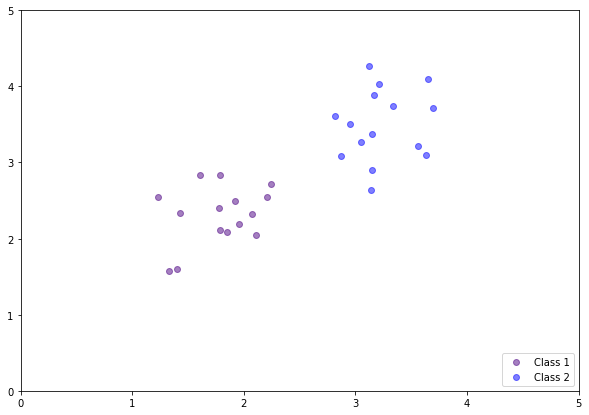

In [14]:
## A simple scatter plot example

import random
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 7)  # Setting default plot size

x_vals_1 = [1.92, 1.79, 1.96, 1.4, 1.61, 1.23, 1.43, 1.85, 2.07, 2.24, 2.11, 1.78, 2.21, 1.79, 1.33]
y_vals_1 = [2.5, 2.11, 2.19, 1.6, 2.83, 2.55, 2.33, 2.09, 2.32, 2.72, 2.05, 2.4, 2.55, 2.83, 1.58]

x_vals_2 = [3.63, 3.12, 3.21, 3.15, 3.56, 3.17, 3.05, 3.14, 2.87, 3.65, 2.82, 3.34, 3.7, 2.95, 3.15]
y_vals_2 = [3.1, 4.27, 4.03, 3.37, 3.22, 3.89, 3.27, 2.64, 3.09, 4.1, 3.61, 3.74, 3.71, 3.51, 2.9]


plt.scatter(x_vals_1, y_vals_1, label='Class 1', c='indigo', alpha=0.5)

plt.scatter(x_vals_2, y_vals_2, label='Class 2', c='blue', alpha=0.5)

plt.ylim(ymin=0, ymax=5)
plt.xlim(xmin=0, xmax=5)

plt.legend(loc=4)

plt.show()

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


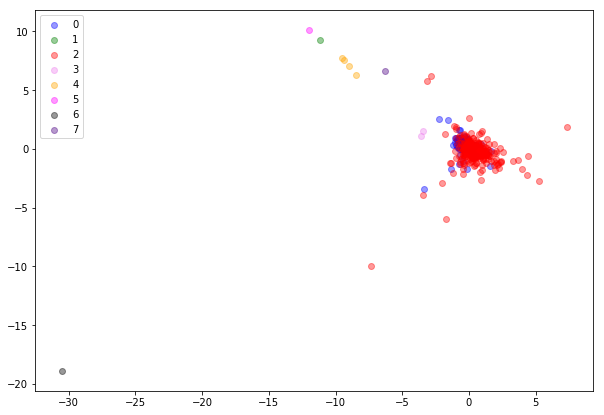

In [15]:
## Projecting all vectors to 2 dimensions using linear discriminant analysis (LDA) and viewing a scatter plot

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 7)  # Setting default plot size

lda = LDA(n_components=2) #2-dimensional LDA

y = cluster_classes

lda_transformed = pd.DataFrame(lda.fit_transform(X.toarray(), y))

lda_transformed['y'] = y

plt.scatter(lda_transformed[lda_transformed['y']==0][0], lda_transformed[lda_transformed['y']==0][1], label='0', c='blue', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==1][0], lda_transformed[lda_transformed['y']==1][1], label='1', c='green', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==2][0], lda_transformed[lda_transformed['y']==2][1], label='2', c='red', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==3][0], lda_transformed[lda_transformed['y']==3][1], label='3', c='violet', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==4][0], lda_transformed[lda_transformed['y']==4][1], label='4', c='orange', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==5][0], lda_transformed[lda_transformed['y']==5][1], label='5', c='magenta', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==6][0], lda_transformed[lda_transformed['y']==6][1], label='6', c='black', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==7][0], lda_transformed[lda_transformed['y']==7][1], label='7', c='indigo', alpha=0.4)

plt.legend(loc=2)

plt.show()

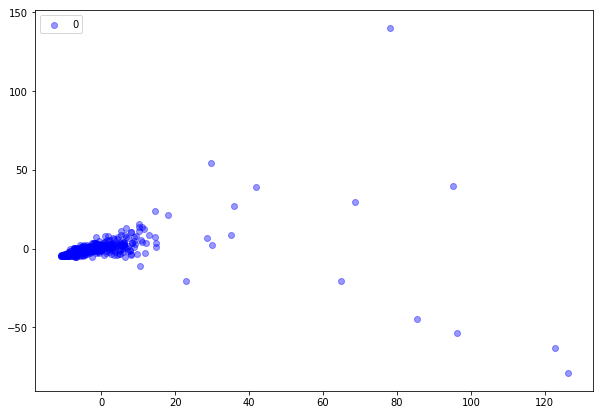

In [16]:
## Projecting all vectors to 2 dimensions using principal component analysis (PCA) and viewing a scatter plot

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 7)  # Setting default plot size

pca = PCA(n_components=2) #2-dimensional LDA

pca_transformed = pca.fit_transform(X.toarray())

plt.scatter([pair[0] for pair in pca_transformed], [pair[1] for pair in pca_transformed], label='0', c='blue', alpha=0.4)

plt.legend(loc=2)

plt.show()

### *Clustering in topic space*

In [17]:
%%capture
!pip3 install lda

In [18]:
import lda

model = lda.LDA(n_topics=8, n_iter=1000, random_state=1)

model.fit(X)

INFO:lda:n_documents: 451
INFO:lda:vocab_size: 18084
INFO:lda:n_words: 215533
INFO:lda:n_topics: 8
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -2393892
INFO:lda:<10> log likelihood: -2014323
INFO:lda:<20> log likelihood: -1943768
INFO:lda:<30> log likelihood: -1916179
INFO:lda:<40> log likelihood: -1903004
INFO:lda:<50> log likelihood: -1895432
INFO:lda:<60> log likelihood: -1890202
INFO:lda:<70> log likelihood: -1886172
INFO:lda:<80> log likelihood: -1882790
INFO:lda:<90> log likelihood: -1881253
INFO:lda:<100> log likelihood: -1878386
INFO:lda:<110> log likelihood: -1877507
INFO:lda:<120> log likelihood: -1876716
INFO:lda:<130> log likelihood: -1875726
INFO:lda:<140> log likelihood: -1874009
INFO:lda:<150> log likelihood: -1873489
INFO:lda:<160> log likelihood: -1872991
INFO:lda:<170> log likelihood: -1871191
INFO:lda:<180> log likelihood: -1870671
INFO:lda:<190> log likelihood: -1871127
INFO:lda:<200> log likelihood: -1870061
INFO:lda:<210> log likelihood: -1870073
INFO:lda:<

In [19]:
topic_features = model.doc_topic_

print(len(topic_features))

topic_features[:2]

451


array([[  9.73025048e-02,   2.12909441e-01,   2.12909441e-01,
          9.63391137e-04,   9.63391137e-04,   9.63391137e-04,
          9.63391137e-04,   4.73025048e-01],
       [  6.56669463e-01,   8.82969799e-02,   2.11828859e-02,
          2.09731544e-04,   1.90855705e-02,   3.79614094e-02,
          1.76384228e-01,   2.09731544e-04]])

In [20]:
## Clustering documents using topic vectors (instead of vocabulary vectors, which we used above)

from sklearn.cluster import KMeans

kmeans_topic_classifier = KMeans(n_clusters=8, init='k-means++', n_init=15, max_iter=1000, algorithm='auto')
                                         ## ^ docuements to be grouped in 8 clusters 

topic_cluster_classes = kmeans_topic_classifier.fit_predict(topic_features) 

print(len(topic_cluster_classes))

topic_cluster_classes[:20]               ## Viewing first 20 cluster assignments

451


array([1, 7, 6, 4, 2, 6, 5, 7, 7, 1, 7, 0, 3, 5, 3, 5, 2, 5, 0, 3], dtype=int32)

In [21]:
## Write each document to a new text file, with each cluster of documents in its own directory

try: os.mkdir('/sharedfolder/nyt_topic_clusters_11-9-2017/')
except: pass

for i in range(len(documents_filtered)):
    
    out_dir = '/sharedfolder/nyt_topic_clusters_11-9-2017/Cluster_' + str(topic_cluster_classes[i])  ## Creating a directory pathname that
                                                                                         ## includes the assigned cluster number.
    try: os.mkdir(out_dir)  ## Creating the out_dir directory if it does not yet exist
    except: pass
    
    os.chdir(out_dir)
    
    out_filename = 'Document_' + str(i) + '.txt'    ## Creating a filename for the text file
    
    with open(out_filename, 'w') as file_out:
        file_out.write(document_list[i])            ## Writing text from original (non-preprocessed) document list


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


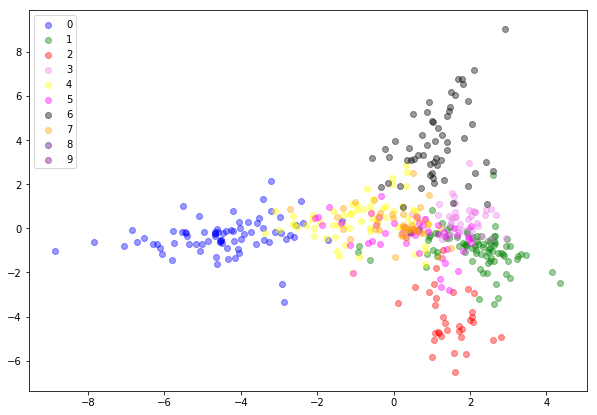

In [22]:
## Projecting all topic vectors to 2 dimensions using linear discriminant analysis (LDA) and viewing a scatter plot

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 7)  # Setting default plot size

lda = LDA(n_components=2) #2-dimensional LDA

y = topic_cluster_classes

lda_transformed = pd.DataFrame(lda.fit_transform(topic_features, y))

lda_transformed['y'] = y

plt.scatter(lda_transformed[lda_transformed['y']==0][0], lda_transformed[lda_transformed['y']==0][1], label='0', c='blue', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==1][0], lda_transformed[lda_transformed['y']==1][1], label='1', c='green', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==2][0], lda_transformed[lda_transformed['y']==2][1], label='2', c='red', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==3][0], lda_transformed[lda_transformed['y']==3][1], label='3', c='violet', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==4][0], lda_transformed[lda_transformed['y']==4][1], label='4', c='yellow', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==5][0], lda_transformed[lda_transformed['y']==5][1], label='5', c='magenta', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==6][0], lda_transformed[lda_transformed['y']==6][1], label='6', c='black', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==7][0], lda_transformed[lda_transformed['y']==7][1], label='7', c='orange', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==8][0], lda_transformed[lda_transformed['y']==8][1], label='8', c='indigo', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==9][0], lda_transformed[lda_transformed['y']==9][1], label='9', c='purple', alpha=0.4)

plt.legend(loc=2)

plt.show()

In [23]:
## Viewing the most frequently used words in each topic cluster

import collections
from pprint import pprint


for topic_cluster_id in range(8):
    
    print('Topic cluster: ' + str(topic_cluster_id))    
    
    words = []
    
    for i in range(len(documents_filtered)):
        if topic_cluster_classes[i] == topic_cluster_id:
            words += documents_filtered[i].split(' ')

    counter = collections.Counter(words)
    pprint(counter.most_common()[:25])
    print()


Topic cluster: 0
[('said', 329),
 ('mr.', 296),
 ('new', 277),
 ('time', 245),
 ('ms.', 212),
 ('york', 198),
 ('like', 190),
 ('one', 184),
 ('stori', 134),
 ('imag', 124),
 ('year', 121),
 ('photo', 117),
 ('newslett', 117),
 ('work', 108),
 ('pleas', 106),
 ('read', 104),
 ('credit', 101),
 ('also', 101),
 ('first', 101),
 ('look', 95),
 ('continu', 95),
 ('show', 94),
 ('main', 89),
 ('say', 85),
 ('peopl', 83)]

Topic cluster: 1
[('mr.', 629),
 ('said', 424),
 ('trump', 297),
 ('new', 293),
 ('time', 265),
 ('democrat', 264),
 ('state', 260),
 ('main', 208),
 ('would', 207),
 ('republican', 203),
 ('continu', 202),
 ('newslett', 198),
 ('stori', 196),
 ('read', 190),
 ('pleas', 184),
 ('presid', 180),
 ('york', 179),
 ('year', 172),
 ('sign', 171),
 ('one', 156),
 ('elect', 155),
 ('like', 149),
 ('also', 137),
 ('peopl', 135),
 ('parti', 127)]

Topic cluster: 2
[('car', 382),
 ('compani', 236),
 ('said', 195),
 ('like', 187),
 ('new', 178),
 ('would', 149),
 ('one', 145),
 ('coul